In [70]:
library(Seurat)
library(Matrix)
library(dplyr)
library(ggplot2)
library(ggVennDiagram)
library(readxl)
library(viridis)

In [2]:
ruta <- "/home/mlopez/Desktop/alzheimer/scRNA/results/datos_filtrados"
archivos <- list.files(ruta, pattern = "_seurat\\.rds$", full.names = TRUE)

# Cargar todos los Seurat objects en una lista
seurat_list <- lapply(archivos, readRDS)
names(seurat_list) <- gsub("_seurat.rds", "", basename(archivos))

In [100]:
metadata <- read.csv("/home/mlopez/Desktop/alzheimer/scRNA/results/metadata_samples.csv", header = TRUE, stringsAsFactors = FALSE)

In [102]:
# B1 -> control o alzheimer preclínico (11 muestras)
# B2 -> alzheimer temprano/moderado (5 muestras)
# B3 -> alzheimer avanzado (16 muestras)

### selecciono por memoria (no puede el PC) B1 y B2. Además, un paciente con alzheimer avanzado, 
### el tratamiento no mejoraŕia mucho su calidad de vida 

In [4]:
metadata_fb1b2 <- metadata[metadata$group %in% c("B1", "B2"), ]

In [5]:
# 1️⃣ GSMs que quiero (los de B1 y B2)
gsm_b1b2 <- metadata_fb1b2$GSM

# 2️⃣ Archivos que correspondan solo a esos GSM
archivos_filtrados <- archivos[
  sapply(archivos, function(f) {
    gsm_id <- sub("^([^_]+)_.*$", "\\1", basename(f))
    gsm_id %in% gsm_b1b2
  })
]

# 3️⃣ Ahora leer solo esos archivos
seurat_list <- lapply(archivos_filtrados, function(f) {
  obj <- readRDS(f)
  gsm_id <- sub("^([^_]+)_.*$", "\\1", basename(f))
  meta_fila <- metadata_fb1b2 %>% filter(GSM == gsm_id)
  obj$Patient_ID <- meta_fila$Patient_ID
  obj$tissue <- meta_fila$tissue
  obj$group <- meta_fila$group
  obj$age <- meta_fila$age
  obj$Sex <- meta_fila$Sex
  return(obj)
})

# 4️⃣ Nombrar con GSM
names(seurat_list) <- sapply(archivos_filtrados, function(f) sub("^([^_]+)_.*$", "\\1", basename(f)))

In [6]:
# Combinar todos los objetos Seurat
combined <- Reduce(function(x, y) merge(x, y), seurat_list)

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to en

Normalizing layer: counts.GSM8295013_6289-MW-0199.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject.SeuratProject

Normalizing

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 357261
Number of edges: 10080306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9378
Number of communities: 25
Elapsed time: 217 seconds


1 singletons identified. 24 final clusters.

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:06:03 UMAP embedding parameters a = 0.9922 b = 1.112

17:06:03 Read 357261 rows and found 20 numeric columns

17:06:03 Using Annoy for neighbor search, n_neighbors = 30

17:06:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:06:27 Writing NN index file to temp file /tmp/RtmprhzP1B/file15dc6075b26992

17:06:27 Searching Annoy index using 1 thread, search_k = 3000

17:08:25 Annoy recall = 100%

17:08:26 Commencing smooth kNN distance cali

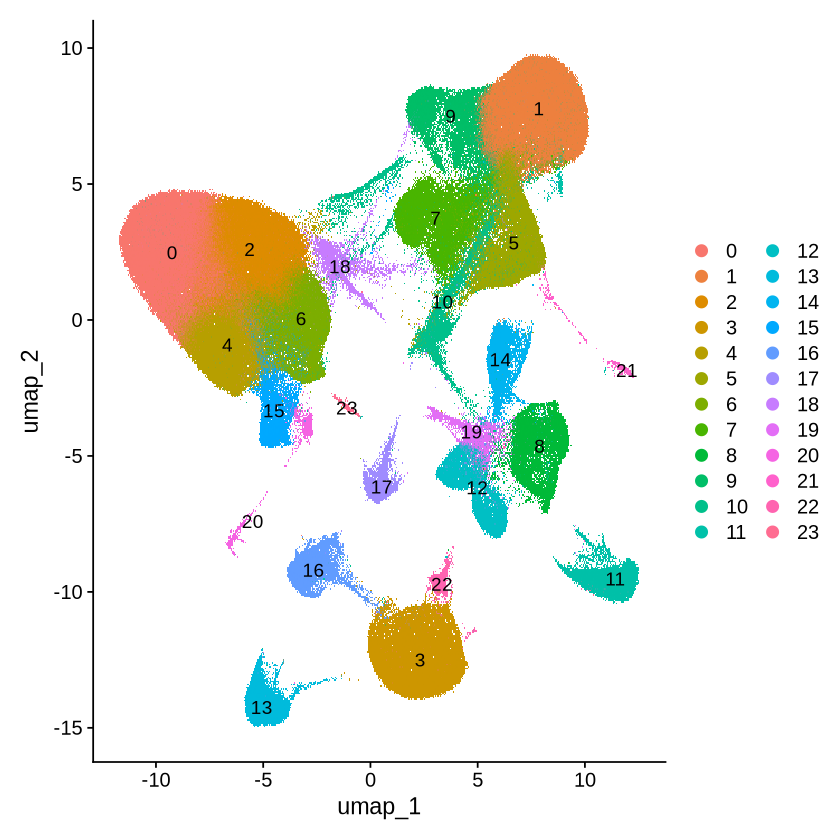

In [7]:
#PCA
combined <- NormalizeData(combined)
combined <- FindVariableFeatures(combined)
combined <- ScaleData(combined)
combined <- RunPCA(combined)
combined <- FindNeighbors(combined, dims = 1:20)
combined <- FindClusters(combined, resolution = 0.5)
combined <- RunUMAP(combined, dims = 1:20)
DimPlot(combined, reduction = "umap", label = TRUE)
saveRDS(combined, file = "/home/mlopez/Desktop/alzheimer/scRNA/results/combined.rds")

In [ ]:
DimPlot(combined, reduction = "umap", group.by = "Patient_ID")
DimPlot(combined, reduction = "umap", group.by = "tissue")
DimPlot(combined, reduction = "umap", group.by = "group")

In [2]:
combined <- readRDS("/home/mlopez/Desktop/alzheimer/scRNA/results/combined.rds")

In [3]:
# Une capas 
combined <- JoinLayers(combined)

# Ahora calcula marcadores, uso solo los genes altamente variantes ya que tarda mucho el calculo.
markers <- FindAllMarkers(
  combined,
  features = VariableFeatures(combined),
  only.pos = TRUE
)

# Revisa la tabla
head(markers)

Calculating cluster 0

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This 

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
HS3ST4,0,2.811272,0.882,0.187,0,0,HS3ST4
P2RY12,0,2.832337,0.848,0.157,0,0,P2RY12
ADAM28,0,2.016976,0.931,0.272,0,0,ADAM28
TBXAS1,0,1.832651,0.944,0.313,0,0,TBXAS1
ATP8B4,0,1.892475,0.905,0.275,0,0,ATP8B4
ARHGAP22,0,2.144773,0.866,0.236,0,0,ARHGAP22


In [42]:
table(markers$cluster) # se crean 23 cluster que corresponderían a cada tipo celular


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
311 570 325 572 275 641 264 508 758 628 492 474 775 300 931 292 561 621 290 560 
 20  21  22  23 
321 636 762 417 

In [4]:
saveRDS(combined, file = "/home/mlopez/Desktop/alzheimer/scRNA/results/combined.rds")
saveRDS(markers, file = "/home/mlopez/Desktop/alzheimer/scRNA/results/markers.rds")

In [2]:
combined <- readRDS("/home/mlopez/Desktop/alzheimer/scRNA/results/combined.rds")
markers <- readRDS("/home/mlopez/Desktop/alzheimer/scRNA/results/markers.rds")

In [6]:
# Tomamos top 5 genes por cluster ordenando por avg_log2FC
top_markers <- markers %>%
  group_by(cluster) %>%
  slice_max(order_by = avg_log2FC, n = 5)

print(top_markers)

### se relaciona los genes exp diferenciados de cada cluster con el tipo de celúla

# A tibble: 120 × 7
# Groups:   cluster [24]
   p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene      
   <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>     
 1     0       3.03 0.174 0.02          0 0       LINC02642 
 2     0       2.86 0.529 0.091         0 0       AC008691.1
 3     0       2.83 0.848 0.157         0 0       P2RY12    
 4     0       2.81 0.882 0.187         0 0       HS3ST4    
 5     0       2.73 0.599 0.094         0 0       CX3CR1    
 6     0       3.37 0.374 0.036         0 1       LINC01727 
 7     0       3.13 0.473 0.064         0 1       AC097518.2
 8     0       3.05 0.766 0.164         0 1       ZNF98     
 9     0       2.97 0.634 0.096         0 1       F11-AS1   
10     0       2.86 0.998 0.565         0 1       SLC1A2    
# ℹ 110 more rows


In [7]:
#| Cluster | Genes destacados                      | Tipo celular                   |
#| ------- | ------------------------------------- | --------------------------------------- |
#| 0       | P2RY12, HS3ST4, CX3CR1                | Microglia                               |
#| 1       | SLC1A2, F11-AS1, ZNF98                | Astrocytes                              |
#| 2       | TMEM163, HAMP                         | Oligodendrocytes (posible)              |
#| 3       | DLL4, BTNL9                           | Endothelial (posible)                   |
#| 4       | C3, FCGBP                             | Astrocytes o células inmunes (posible)  |
#| 5       | TNC, LRAT                             | Oligodendrocytes (posible)              |
#| 6       | CD83, RGS1                            | Microglia activada / Células inmunes    |
#| 7       | ADAM12, EMP1                          | Fibroblastos u otro tipo (posible)      |
#| 8       | KCNIP4                                | Neuronas                                |
#| 9       | GFRA1, GNA14                          | Neuronas (posible)                      |
#| 10      | HBA1, HBA2, HBB, EGR3                 | Células sanguíneas / eritrocitos        |
#| 11      | LINC01608, FOLH1, ST18                | Células epiteliales u otro tipo         |
#| 12      | DLX6-AS1, SYNPR, NXPH1, ADARB2, GRIK1 | Neuronas                                |
#| 13      | THEMIS, KLRK1, ITK, PYHIN1, CCL5      | Células inmunes (posible linfocitos)    |
#| 14      | SLC14A1, HS3ST3A1                     | Células epiteliales o especializadas    |
#| 15      | MARCO, SIGLEC1, CR1                   | Microglia o macrófagos                  |
#| 16      | LINC02172, CARMN, CYSLTR2, GJC1       | Neuronas o células musculares (posible) |
#| 17      | BMP5, COL6A3, CEMIP                   | Células mesenquimales o fibroblastos    |
#| 18      | ROR2, TMEM163, GK                     | Neuronas o células progenitoras         |
#| 19      | MRC1, PCDH11Y                         | Macrófagos o células inmunes            |
#| 20      | BLK, CD300E, CLEC12A, LYZ             | Células inmunes                         |
#| 21      | LHFPL3, BEST3, TNR, SMOC1             | Células de la glía o células de soporte |
#| 22      | IGFBP3, CP, EDN1, PIK3R3              | Células endoteliales o estromales       |
#| 23      | LINC01792, LINC01445, ANKRD18A, LRP2  | Células epiteliales o especializadas    |

In [8]:
# Usa solo genes únicos de top_markers
heatmap_genes <- unique(top_markers$gene)

# Dibuja Heatmap
DoHeatmap(combined, features = heatmap_genes) + 
  theme(axis.text.y = element_text(size = 6))

In [9]:
# - Microglia: 0
# - Astrocytes: 1
# - Oligodendrocytes: 2 y/o 5
# - Endothelial: 3
# - Neurons: 8 y 12

clusters_of_interest <- c(0, 1, 2, 3, 8, 12)

In [14]:
combined_filtered <- subset(combined, idents = clusters_of_interest)

new.ids <- c("Microglia", "Astrocytes", "Oligodendrocytes", "Endothelial", "Neurons_1", "Neurons_2")
names(new.ids) <- clusters_of_interest
combined_filtered <- RenameIdents(combined_filtered, new.ids)

In [16]:
table(Idents(combined_filtered))


       Microglia       Astrocytes Oligodendrocytes      Endothelial 
           58029            47555            38299            24201 
       Neurons_1        Neurons_2 
           13599            10659 

In [26]:
astrocytes <- subset(combined_filtered, idents = "Astrocytes")

# Encuentra genes diferencialmente expresados entre B2 y B1 solo en Neurons_1
markers_B2_vs_B1_astrocytes <- FindMarkers(
  astrocytes,
  ident.1 = "B2",
  ident.2 = "B1",
  group.by = "group"
)

In [27]:
oligodendrocytes <- subset(combined_filtered, idents = "Oligodendrocytes")

# Encuentra genes diferencialmente expresados entre B2 y B1 solo en Neurons_1
markers_B2_vs_B1_oligodendrocytes <- FindMarkers(
  oligodendrocytes,
  ident.1 = "B2",
  ident.2 = "B1",
  group.by = "group"
)

In [28]:
endothelial <- subset(combined_filtered, idents = "Endothelial")

# Encuentra genes diferencialmente expresados entre B2 y B1 solo en Neurons_1
markers_B2_vs_B1_endothelial <- FindMarkers(
  endothelial,
  ident.1 = "B2",
  ident.2 = "B1",
  group.by = "group"
)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



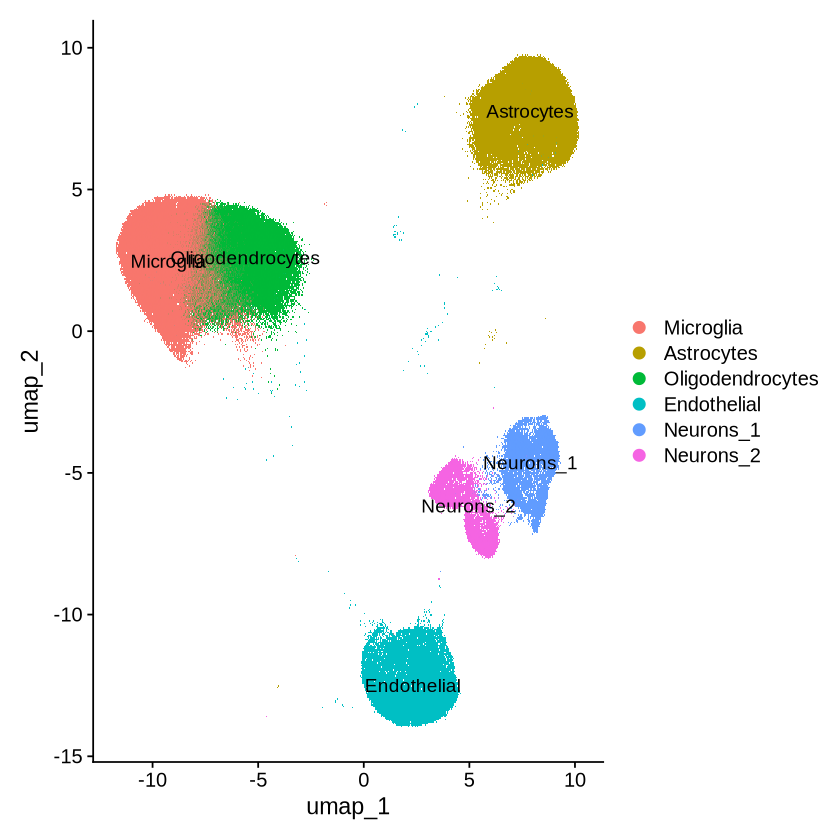

In [29]:
DimPlot(combined_filtered, reduction = "umap", label = TRUE)

In [30]:
microglia <- subset(combined_filtered, idents = "Microglia")

# Encuentra genes diferencialmente expresados entre B2 y B1 solo en Neurons_1
markers_B2_vs_B1_microglia <- FindMarkers(
  microglia,
  ident.1 = "B2",
  ident.2 = "B1",
  group.by = "group"
)

In [31]:
neurons1 <- subset(combined_filtered, idents = "Neurons_1")

# Encuentra genes diferencialmente expresados entre B2 y B1 solo en Neurons_1
markers_B2_vs_B1_neurons1 <- FindMarkers(
  neurons1,
  ident.1 = "B2",
  ident.2 = "B1",
  group.by = "group"
)


In [32]:
neurons2 <- subset(combined_filtered, idents = "Neurons_2")

# Encuentra genes diferencialmente expresados entre B2 y B1 solo en Neurons_1
markers_B2_vs_B1_neurons2 <- FindMarkers(
  neurons2,
  ident.1 = "B2",
  ident.2 = "B1",
  group.by = "group"
)

In [45]:
gen_exp_astrocytes <- rownames(markers_B2_vs_B1_astrocytes[markers_B2_vs_B1_astrocytes$p_val_adj < 0.05,])
gen_exp_oligodendrocytes <- rownames(markers_B2_vs_B1_oligodendrocytes[markers_B2_vs_B1_oligodendrocytes$p_val_adj < 0.05,])
gen_exp_endothelial <- rownames(markers_B2_vs_B1_endothelial[markers_B2_vs_B1_endothelial$p_val_adj < 0.05,])
gen_exp_microglia <- rownames(markers_B2_vs_B1_microglia[markers_B2_vs_B1_microglia$p_val_adj < 0.05,])
gen_exp_neurons1 <- rownames(markers_B2_vs_B1_neurons1[markers_B2_vs_B1_neurons1$p_val_adj < 0.05,])
gen_exp_neurons2 <- rownames(markers_B2_vs_B1_neurons2[markers_B2_vs_B1_neurons2$p_val_adj < 0.05,])

In [46]:
venn_list <- list(
  Microglia = gen_exp_microglia,
  Astrocytes = gen_exp_astrocytes,
  Oligodendrocytes = gen_exp_oligodendrocytes,
  Endothelial = gen_exp_endothelial,
  Neurons_1 = gen_exp_neurons1,
  Neurons_2 = gen_exp_neurons2
)

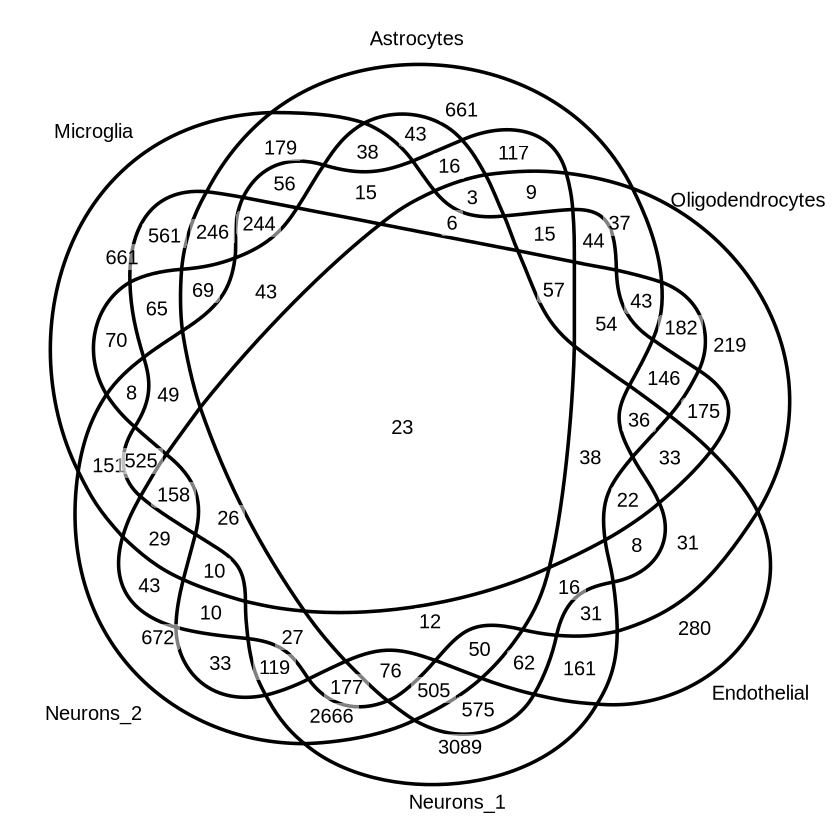

In [104]:
ggVennDiagram(venn_list, label = "count") +
  scale_fill_gradient(low = "white", high = "white") +  # mismo color
  theme_void() +
  theme(legend.position = "none")

## solo hay 23 genes sig diferenciado comunes en todas las células. 

In [72]:
AD_T4_targets <- read_excel("/home/mlopez/Desktop/alzheimer/data/AD_T4_targets.xlsx")

New names:
• `` -> `...1`


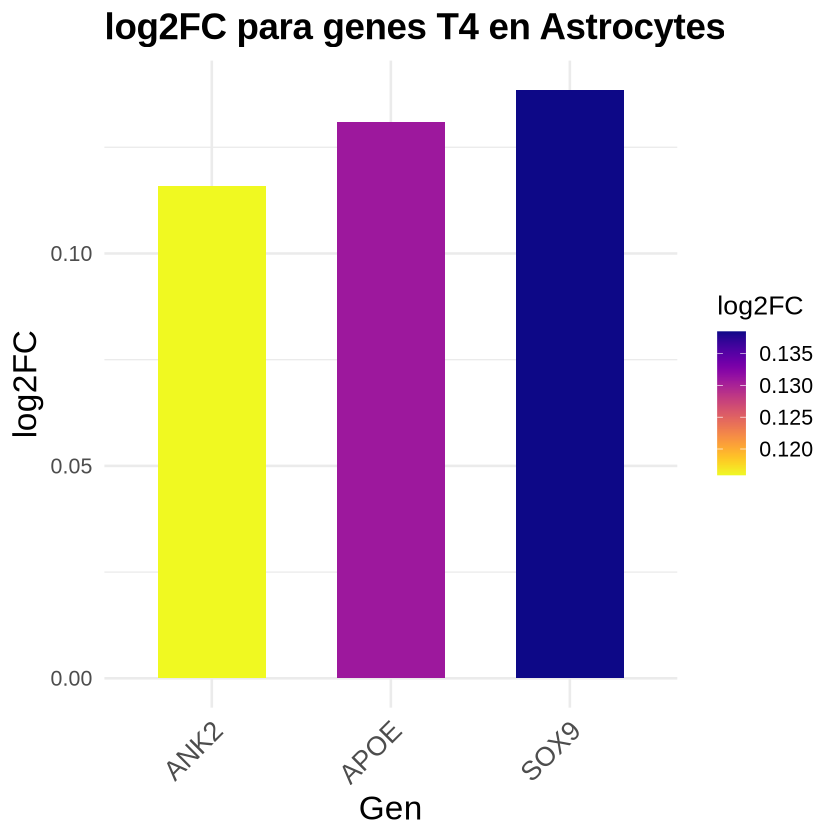

In [94]:
T4_astrocytes <- na.omit(markers_B2_vs_B1_astrocytes[AD_T4_targets$Prot,])

T4_astrocytes_sig <- T4_astrocytes[T4_astrocytes$p_val_adj < 0.05, ]

T4_astrocytes_sig$gene <- rownames(T4_astrocytes_sig)

ggplot(T4_astrocytes_sig, aes(x = gene, y = avg_log2FC, fill = avg_log2FC)) +
  geom_col(width = 0.6) +
  scale_fill_viridis(option = "C", direction = -1) +
  labs(
    title = "log2FC para genes T4 en Astrocytes",
    x = "Gen",
    y = "log2FC",
    fill = "log2FC"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 22, face = "bold")
  )

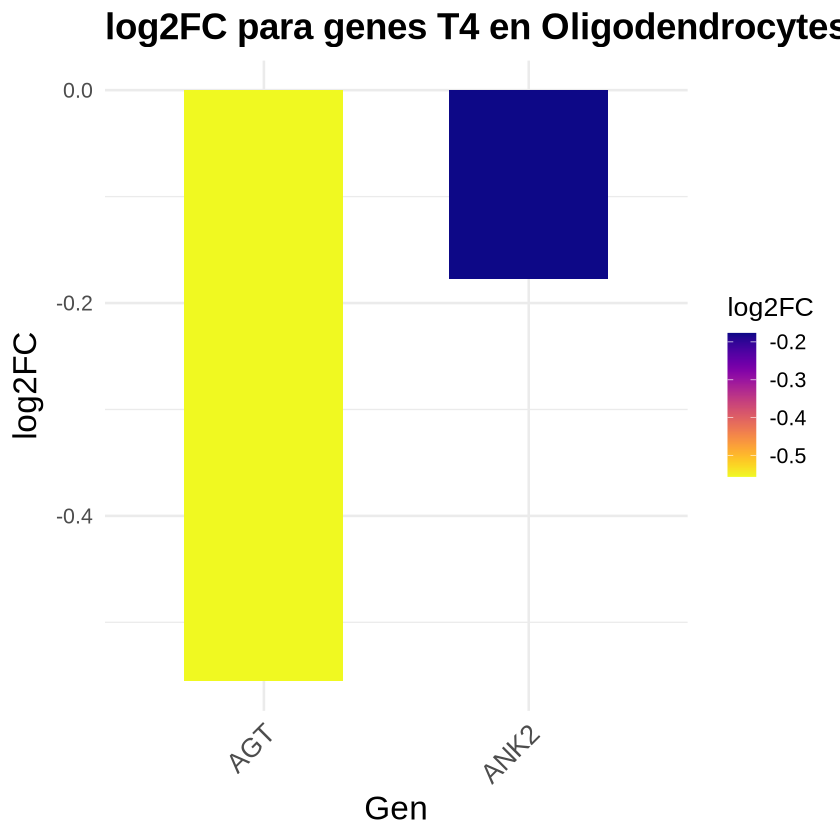

In [95]:
T4_oligodendrocytes <- na.omit(markers_B2_vs_B1_oligodendrocytes[AD_T4_targets$Prot,])

T4_oligodendrocytes_sig <- T4_oligodendrocytes[T4_oligodendrocytes$p_val_adj < 0.05, ]

T4_oligodendrocytes_sig$gene <- rownames(T4_oligodendrocytes_sig)

ggplot(T4_oligodendrocytes_sig, aes(x = gene, y = avg_log2FC, fill = avg_log2FC)) +
  geom_col(width = 0.6) +
  scale_fill_viridis(option = "C", direction = -1) +
  labs(
    title = "log2FC para genes T4 en Oligodendrocytes",
    x = "Gen",
    y = "log2FC",
    fill = "log2FC"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 22, face = "bold")
  )

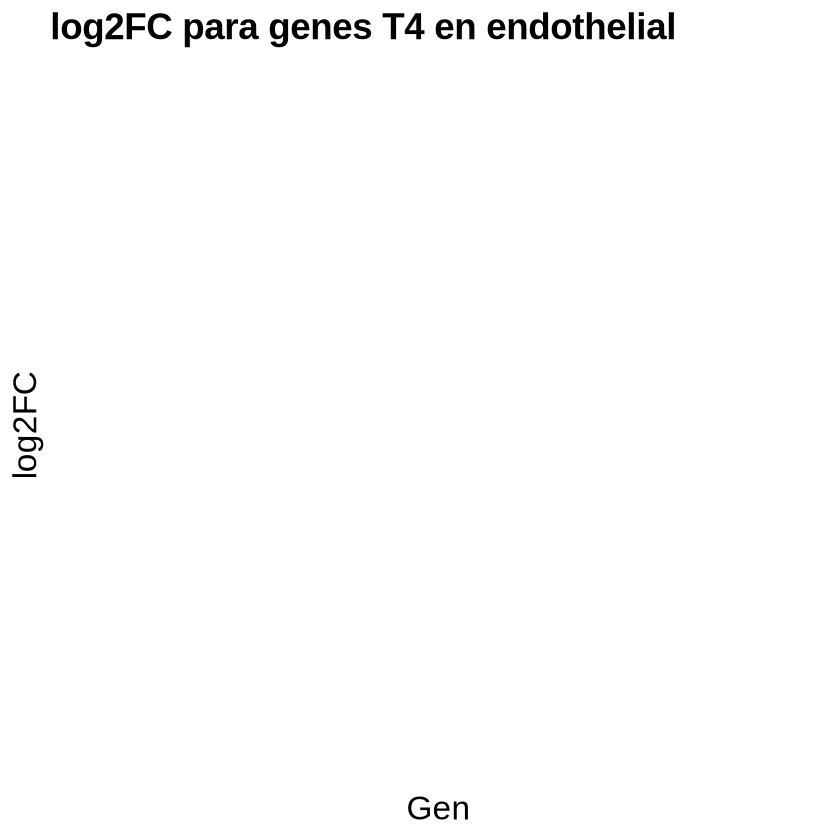

In [96]:
T4_endothelial <- na.omit(markers_B2_vs_B1_endothelial[AD_T4_targets$Prot,])

T4_endothelial_sig <- T4_endothelial[T4_endothelial$p_val_adj < 0.05, ]

T4_endothelial_sig$gene <- rownames(T4_endothelial_sig)

ggplot(T4_endothelial_sig, aes(x = gene, y = avg_log2FC, fill = avg_log2FC)) +
  geom_col(width = 0.6) +
  scale_fill_viridis(option = "C", direction = -1) +
  labs(
    title = "log2FC para genes T4 en endothelial",
    x = "Gen",
    y = "log2FC",
    fill = "log2FC"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 22, face = "bold")
  )

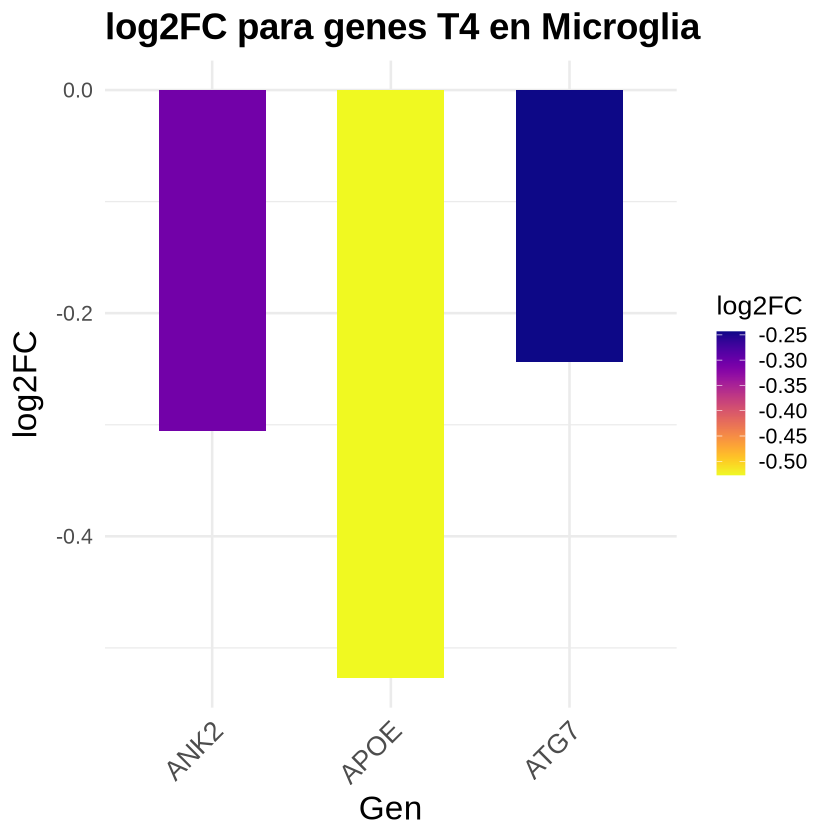

In [93]:
T4_microglia <- na.omit(markers_B2_vs_B1_microglia[AD_T4_targets$Prot,])

T4_microglia_sig <- T4_microglia[T4_microglia$p_val_adj < 0.05, ]

T4_microglia_sig$gene <- rownames(T4_microglia_sig)

ggplot(T4_microglia_sig, aes(x = gene, y = avg_log2FC, fill = avg_log2FC)) +
  geom_col(width = 0.6) +
  scale_fill_viridis(option = "C", direction = -1) +
  labs(
    title = "log2FC para genes T4 en Microglia",
    x = "Gen",
    y = "log2FC",
    fill = "log2FC"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 22, face = "bold")
  )

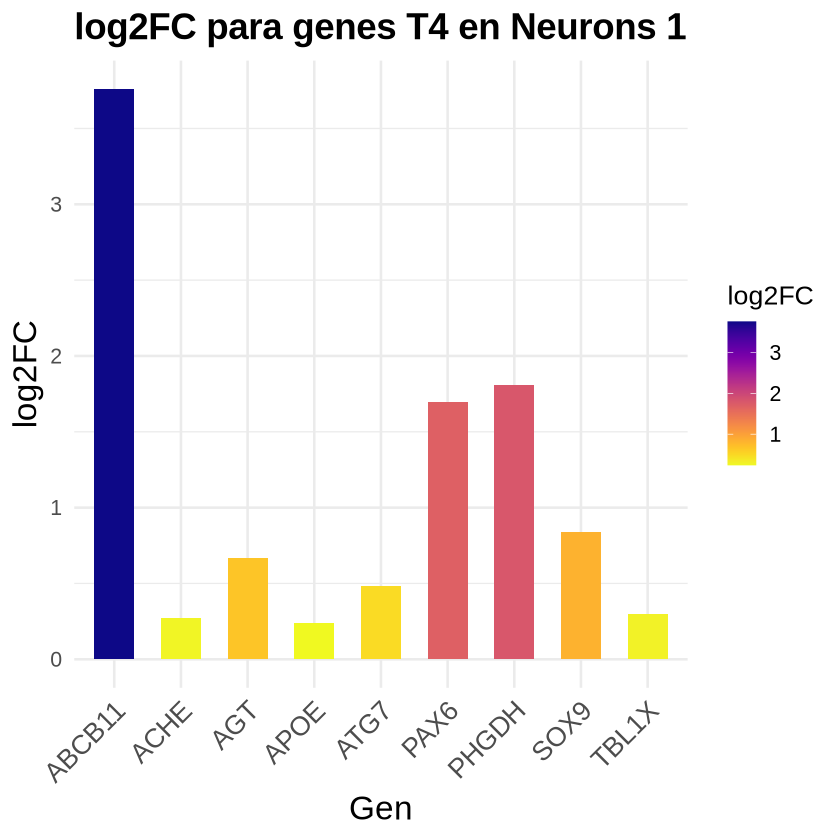

In [97]:
T4_neurons1 <- na.omit(markers_B2_vs_B1_neurons1[AD_T4_targets$Prot,])

T4_neurons1_sig <- T4_neurons1[T4_neurons1$p_val_adj < 0.05, ]

T4_neurons1_sig$gene <- rownames(T4_neurons1_sig)

ggplot(T4_neurons1_sig, aes(x = gene, y = avg_log2FC, fill = avg_log2FC)) +
  geom_col(width = 0.6) +
  scale_fill_viridis(option = "C", direction = -1) +
  labs(
    title = "log2FC para genes T4 en Neurons 1",
    x = "Gen",
    y = "log2FC",
    fill = "log2FC"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 22, face = "bold")
  )

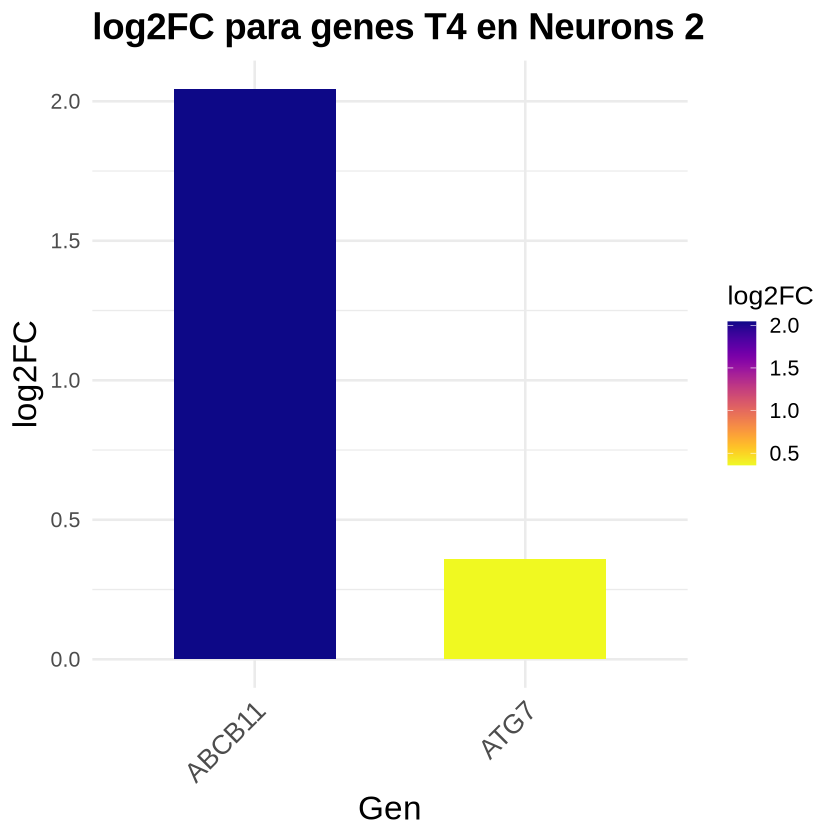

In [98]:
T4_neurons2 <- na.omit(markers_B2_vs_B1_neurons2[AD_T4_targets$Prot,])

T4_neurons2_sig <- T4_neurons2[T4_neurons2$p_val_adj < 0.05, ]

T4_neurons2_sig$gene <- rownames(T4_neurons2_sig)

ggplot(T4_neurons2_sig, aes(x = gene, y = avg_log2FC, fill = avg_log2FC)) +
  geom_col(width = 0.6) +
  scale_fill_viridis(option = "C", direction = -1) +
  labs(
    title = "log2FC para genes T4 en Neurons 2",
    x = "Gen",
    y = "log2FC",
    fill = "log2FC"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 22, face = "bold")
  )